# Introduction
Consider N spins 1/2 system, initially prepared in either $|\downarrow\downarrow\downarrow\uparrow\uparrow\uparrow>$ or Néel state $|\uparrow\downarrow\uparrow\downarrow\uparrow>$. The time evolution will be governed by a Hamiltonian of the form

$$
\hat{H} = -J_{xy}\sum_{i=1}^{N-1}(\sigma_{x}^{i}\sigma_{x}^{i+1}+\sigma_{y}^{i}\sigma_{y}^{i+1}) + \sum_{i=1}^{N}(h_{i}\sigma_{z}^{i})
$$

with $J_{xy}>0$ representing nearest neighbor interaction between $x(\sigma_{x})$ and $y(\sigma_{y})$ spins, whereas $h_{i}$ represents an external field that couples to Z-spins at site $i$ and $\sigma_{\alpha}^{i}$ are the Pauli matrices with eigenvalues $\pm1$.

On the basis of parameter $h_{i}\neq0$, we get the following spin chain system: Disordered XX chain for $J_{xy}>0$ and $h_{i} = [-h,h]$. The observable of interest is the staggered magnetization, which is defined as

$$
m_{s}(t) = \frac{1}{N}\sum_{i}(-1)^{i}<\sigma_{z}^{i}>
$$

Here $N$ is the number of qubits. The choice of this observable is necessitated by the realization that for a system with long-range antiferromagnetic order, the staggered magnetization is non-zero and can be treated as the order parameter. Fortunately, $m_{s}(t)$ is in the z-basis, so we only need to post-process calculations on measured qubits to compute the staggered magnetization. The expectation value of the spin operator Pauli-Z has a value of 1 for state $|0>$ and a value of 0 for state $|1>$. After measuring the qubit at the quantum backend, we map the qubit with state $|0>$ to a value of 1 and the qubit with state $|1>$ to a value of 1 to find the required observable, which is staggered magnetization in our case.

To simulate many-body systems, IBM provides different types of simulators. Some of them are noise-free, while others have noise errors. In this regard, Aer is an ideal simulator with zero noise, while the qasm simulator has some noise errors. We will compare the results obtained on the quantum computer with those from the qasm simulator.

First of all, consider the disorder XX chain, $\hat{H} = -J_{xy}\sum_{i=1}^{N-1}(\sigma_{x}^{i}\sigma_{x}^{i+1}+\sigma_{y}^{i}\sigma_{y}^{i+1}) + \sum_{i=1}^{N}(h_{i}\sigma_{z}^{i})$ with $J_{xy}>0$ and $h_{i}=0$ and a Neel state $\psi(t=0) = |\downarrow\uparrow\downarrow\uparrow>$ as an initial state to compute the staggered magnetization to predict the behavior of the system.

As the expectation value of the spin operator Pauli-Z has a value of 1 for state $|\uparrow>$,

$$
\sigma_{z}|\uparrow> = 1|\uparrow>
$$

and a value of -1 for state $|\downarrow>$,

$$
\sigma_{z}|\downarrow> = -1|\downarrow>
$$

From Eqn. (02) and for the Neel state $\psi(t=0) = |\downarrow\uparrow\downarrow\uparrow>$, the staggered magnetization $m_{s}(t=0)$ is

$$
m_{s}(t=0) = \frac{1}{N}\sum_{i}(-1)^{i}<\sigma_{z}^{i}>
$$

$$
m_{s}(t=0) = \frac{1}{4}\left[(-1)^{1}<\downarrow\uparrow\downarrow\uparrow|\sigma_{z}^{1}|\downarrow\uparrow\downarrow\uparrow>+(-1)^{2}<\downarrow\uparrow\downarrow\uparrow|\sigma_{z}^{2}|\downarrow\uparrow\downarrow\uparrow>+(-1)^{3}<\downarrow\uparrow\downarrow\uparrow|\sigma_{z}^{3}|\downarrow\uparrow\downarrow\uparrow>+(-1)^{4}<\downarrow\uparrow\downarrow\uparrow|\sigma_{z}^{4}|\downarrow\uparrow\downarrow\uparrow>\right]
$$

$$
m_{s}(t=0) = \frac{1}{4}\left[(-1)^{1}(-1)+(-1)^{2}(1)+(-1)^{3}(-1)+(-1)^{4}(1)\right]
$$

$$
m_{s}(t=0) = \frac{1}{4}\left[1+1+1+1\right]
$$

$$
m_{s}(t=0) = 1
$$

Hence, we expect $m_{s}(t=0) = 1$, where the initial state is the Neel state.

For the disorder XX chain, the Hamiltonian is given as $\hat{H} = -J_{xy}\sum_{i=1}^{N-1}(\sigma_{x}^{i}\sigma_{x}^{i+1}+\sigma_{y}^{i}\sigma_{y}^{i+1}) + \sum_{i=1}^{N}(h_{i}\sigma_{z}^{i})$.

At later times $(t>0)$, the initial state will evolve under the XX Hamiltonian given above. The staggered magnetization will no longer have its initial value of 1 because the orientation of spins will no longer be purely along the z-axis but will begin to orient in the x-y plane. Hence, the staggered magnetization will approach zero at later times.



In [1]:
#import necessary libraries
import numpy as np
import qiskit as qk
from qiskit.tools.monitor import job_monitor
from qiskit import Aer, IBMQ, execute
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [10]:
#Parameters
#Spin chain system
N = 4 #number of spins/qubits
Jxy = 1
h = 2.0 #Disorder in spin chain system

del_time = 0.06 #time-step size
num_steps = 25 #number of time-steps, we start with a small number for speed of demonstration
shots = 1024 #number of shots for circuit execution

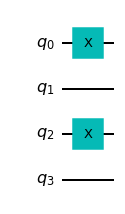

In [11]:
#create the Neel state |1010> 
Neel_state_circuit = qk.QuantumCircuit(N)
Neel_state_circuit.x(0)
Neel_state_circuit.x(2)

#draw the circuit
Neel_state_circuit.draw('mpl')

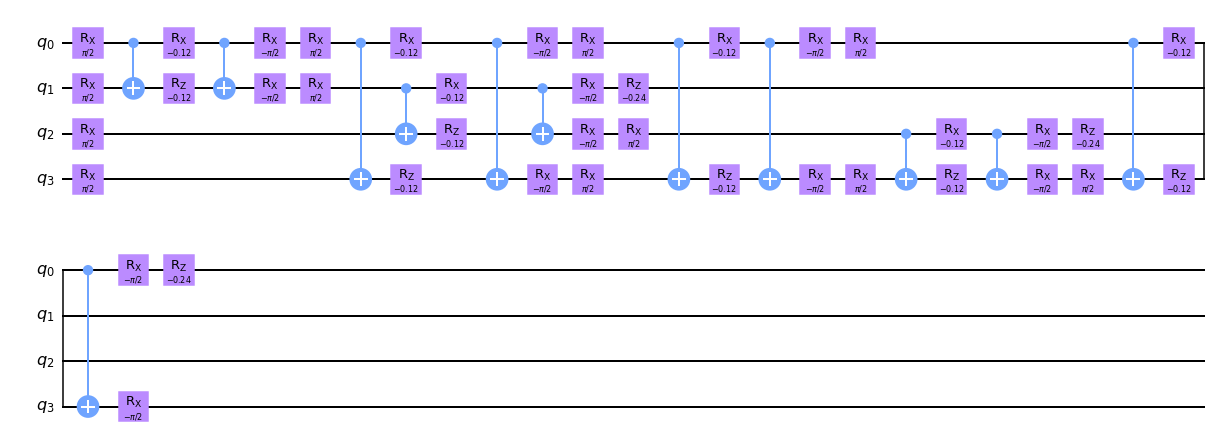

In [12]:
def evolution_circuit(num_time_steps, Jxy, h, N):
    hbar = 1   
    time_evol_circuit = qk.QuantumCircuit(N)
    #define rotation angles in term of Jxy and disorder h
    PhiX = -2.0*Jxy*del_time/hbar
    PhiZ = -2.0*Jxy*h*del_time/hbar

    for step in range(num_time_steps):
        #implement Magic Gate
        for q in range(0,N-1):
            time_evol_circuit.rx(np.pi/2,q)
            time_evol_circuit.rx(np.pi/2,q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.rx(PhiX,q)
            time_evol_circuit.rz(PhiX,q+1)
            time_evol_circuit.cx(q,q+1)
            time_evol_circuit.rx(-np.pi/2,q)
            time_evol_circuit.rx(-np.pi/2,q+1)
        #Closed_chain_part
            time_evol_circuit.rx(np.pi/2,0)
            time_evol_circuit.rx(np.pi/2,3)
            time_evol_circuit.cx(0,3)
            time_evol_circuit.rx(PhiX,0)
            time_evol_circuit.rz(PhiX,3)
            time_evol_circuit.cx(0,3)
            time_evol_circuit.rx(-np.pi/2,0)
            time_evol_circuit.rx(-np.pi/2,3)
        for q in range(0,N-1):
            time_evol_circuit.rz(PhiZ, q)

    return time_evol_circuit

#draw circuit for time-step 1
circ = evolution_circuit(1,Jxy,h,N)
circ.draw('mpl')

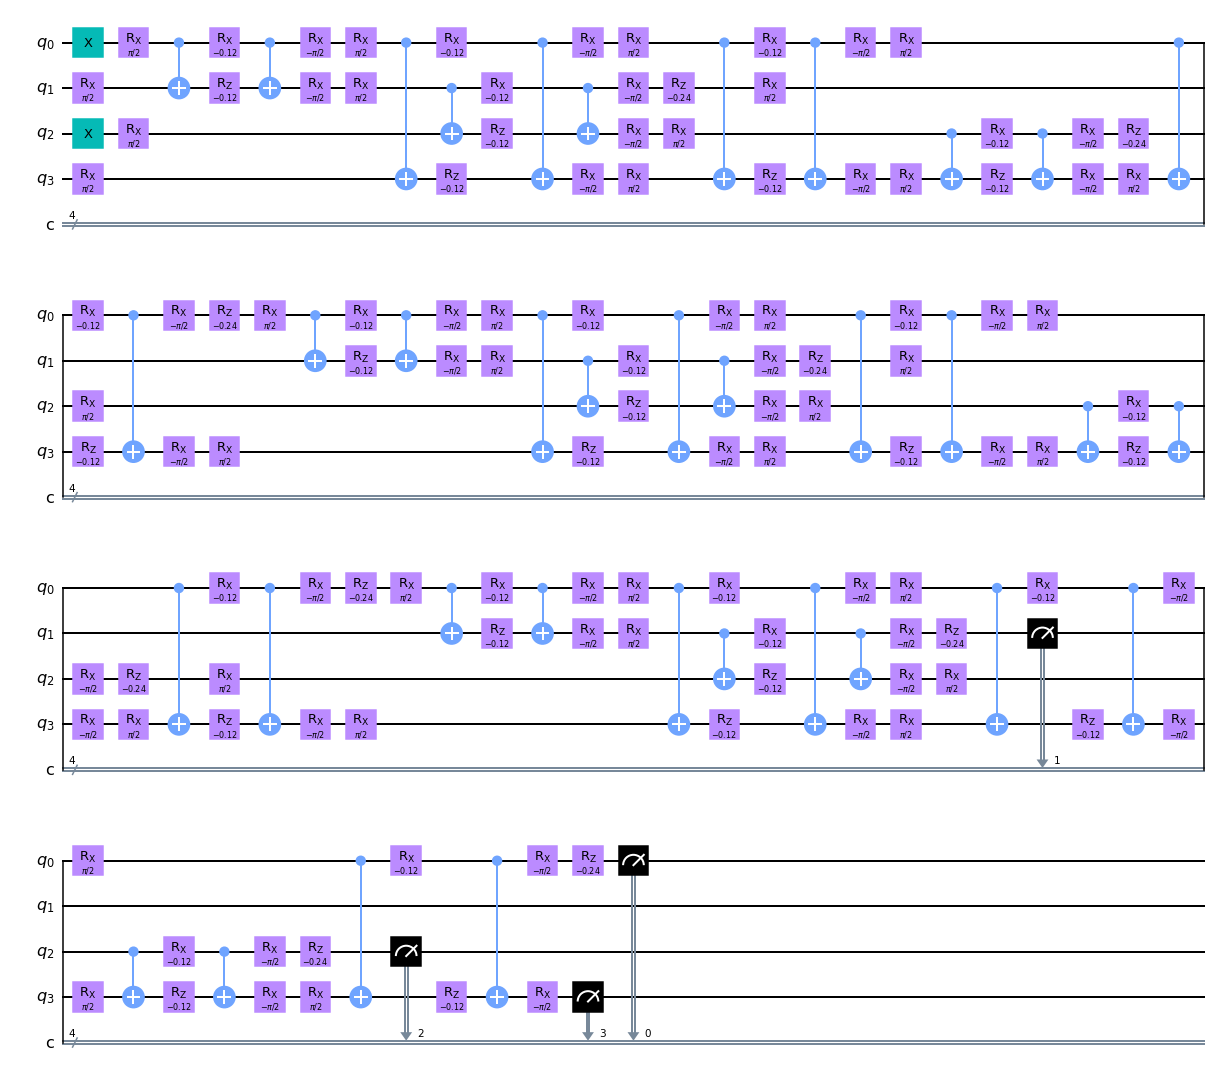

In [13]:
#Create set of final circuits for total time simulation
circuits = []
for i in range(0, num_steps+1):
    total_circ = qk.QuantumCircuit(N,N)
    total_circ.compose(Neel_state_circuit, inplace=True)
    total_circ.compose(evolution_circuit(i,Jxy,h,N), inplace=True)
    total_circ.measure(range(N),range(N))
    circuits.append(total_circ)
    
#draw the circuit for the first time-step
circuits[3].draw('mpl')

In [14]:
#Set up the simulator for simulation
simulator = Aer.get_backend('qasm_simulator')
circs_sim = qk.transpile(circuits, backend=simulator, optimization_level=3)

#Run circuits on the simulator
sim_results = execute(circs_sim, simulator, shots=shots).result()

In [15]:
#define function to compute staggered magnetization
def staggered_magnetization(result: dict, shots: int):
    sm_val = 0
    for spin_str, count in result.items():
        spin_int = [1 - 2 * float(s) for s in spin_str]
        #print(spin_int)
        for i in range(len(spin_int)):
            spin_int[i] = spin_int[i]*(-1)**i
        sm_val += (sum(spin_int) / len(spin_int)) * count
        
        #print(sm_val)
    average_sm = sm_val/shots

    return average_sm

In [9]:
#Simulator post-processing h=0
avg_sm_sim = []
for c in circs_sim:
    result_dict = sim_results.get_counts(c)
    avg_sm_sim.append(staggered_magnetization(result_dict, shots))

In [17]:
#Simulator post-processing for h=2.0
avg_sm_sim_2 = []
for c in circs_sim:
    result_dict = sim_results.get_counts(c)
    avg_sm_sim_2.append(staggered_magnetization(result_dict, shots))

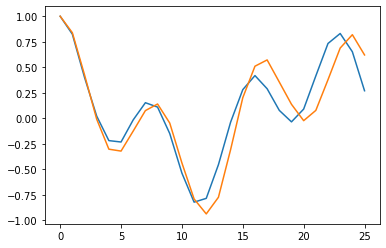

In [18]:
plt.plot(avg_sm_sim_2)
plt.plot(avg_sm_sim)
plt.show()

<Figure size 432x288 with 0 Axes>

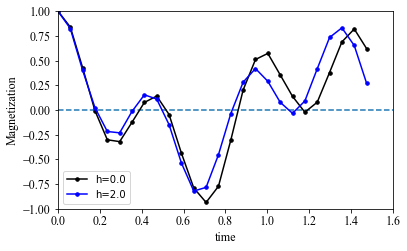

In [21]:
t2 = np.arange(0.0, 1.5, 0.059)
plt.figure()
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(t2, avg_sm_sim, color='black',marker='o', label='h=0.0', markersize = 3.5)
plt.plot(t2, avg_sm_sim_2, color='blue', marker='o', label='h=2.0',markersize = 3.5)
plt.hlines(0, 0, 150, linestyles='dashed')
plt.ylim(-0.6,1.0)
plt.xlim(0,1.6)
plt.legend()
plt.xlabel("time", fontsize=12, fontname="Times New Roman")
plt.yticks([-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0], fontsize=12, fontname="Times New Roman")
plt.xticks(fontsize=12, fontname="Times New Roman")
plt.ylabel("Magnetization", fontsize=12, fontname="Times New Roman")
plt.show()
#Use line below to save figuge as a PNG file
#plt.savefig("staggered_mag.png")